# Цель работы

Изучение алгоритмов и методов регрессии на практике.
# Вариант задания

Вариант №4.

Набор данных: regression.xlsx(лист “var4”).

Список объектов, состоящий из независимых переменных x1, x2 и зависимой переменной y.

salary.csv
Описание столбцов:

•	age — возраст сотрудника в годах;

•	income — годовой доход до текущей работы;

•	experience — количество полных лет профессионального опыта;

•	score_test — результат прохождения профессионального теста;

•	hours_worked — среднее количество рабочих часов в неделю;

•	distance_to_work — расстояние от дома до места работы;

•	savings — сумма сбережений на банковском счёте;

•	debt — общий объём текущих долгов (по кредитам, картам и другим обязательствам, в долларах);

•	education — уровень образования: «High School» (школа), «Bachelor» (бакалавр), «Master» (магистр) или «PhD» (доктор наук);

•	city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или Финикс;

•	job_type — сфера профессиональной деятельности: IT, финансы, здравоохранение, образование или ритейл;

•	marital_status — семейное положение: «Single» (холост/незамужем), «Married» (в браке) или «Divorced» (в разводе);

•	car — наличие автомобиля: «Yes» (есть) или «No» (нет);

•	remote_work — работает ли сотрудник удалённо: «Yes» или «No»;

•	salary — годовая зарплата.

# Ход выполнения работы
### 1. Чтение файла

Перед началом работы необходимо прочитать таблицу и преобразовать в датафрейм.

In [2]:
import pandas as pd
df = pd.read_excel('./regression.xlsx')

### 2. Обзор данных

Далее был проведен классический обзор данных для анализа. Видно, что 1000 значений в датафрейме с типом float. Можно также увидеть, что значения X идут от -2 до 2 не включительно. Второй квартиль для X распологается почти в 0 значении. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [4]:
df.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.000000
mean,-0.000004,0.000028,1.328769
std,1.155279,1.155227,1.615985
min,-1.999458,-1.998031,-2.722868
25%,-0.999670,-0.999294,0.072635
50%,0.000488,-0.000001,1.256896
75%,0.998817,0.999619,2.418257
max,1.999308,1.997041,5.734255


In [5]:
df.head(10)

,x1,x2,y
0,1.929428,1.511727,5.734255
1,-0.330281,-0.898878,-0.623706
2,0.688773,0.908247,1.028884
3,-0.008892,-0.518823,-0.894802
4,-1.698716,0.610347,2.822400
5,-0.269050,-0.341612,-1.093544
6,0.676858,0.686104,1.171928
7,0.742416,-0.720371,0.327117
8,-1.006270,1.235734,1.976935
9,-1.999458,-1.252385,2.453643


### 3. Обработка данных

Далее была проведена обработка даныных. Проверено количество пустых значений и явных дубликатов. Также привели названия к состоянию без лишних пробелов.

In [6]:
print(df.isna().sum())

x1    0
x2    0
y     0
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
df.columns = df.columns.str.strip()

### 4. Простая линейная регрессия

Для построения моделей линейной регрессии были использованы возможности библиотеки scikit-learn, обеспечивающей удобный инструментарий для обучения, проверки и оценки моделей машинного обучения. Исходные данные содержали три признака: две независимых переменных x1 и x2, а также зависимую переменную y. Перед обучением данные были разделены на тренировочную и валидационную выборки в соотношении 75% к 25%, что позволило отделить часть данных для проверки точности построенных моделей. Для каждой из переменных x1 и x2 была обучена отдельная модель простой линейной регрессии. После обучения модели использовались для предсказания значений целевой переменной на валидационной выборке, что позволило в дальнейшем провести сравнение предсказанных и фактических результатов.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

y = df['y']
X1 = df['x1']
X2 = df['x2']

X1_train, X1_valid, y1_train, y1_valid = train_test_split(
    X1,
    y,
    test_size=0.25,
    random_state=0
)

X2_train, X2_valid, y2_train, y2_valid = train_test_split(
    X2,
    y,
    test_size = 0.25,
    random_state=0
)

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(np.array(X1_train).reshape(-1,1), y1_train)
model2.fit(np.array(X2_train).reshape(-1,1), y2_train)

predictions_valid1 = model1.predict(np.array(X1_valid).reshape(-1,1))
predictions_valid2 = model2.predict(np.array(X2_valid).reshape(-1,1))

Для оценки точности работы обученных моделей были сформированы датафреймы, содержащие реальные и предсказанные значения целевой переменной, что позволило визуально и численно сравнить результаты регрессии. На основе этих данных были рассчитаны ключевые метрики качества моделей: MAE (средняя абсолютная ошибка), MSE (среднеквадратичная ошибка), RMSE (корень из среднеквадратичной ошибки) и коэффициент детерминации R², показывающий долю объяснённой дисперсии.

In [10]:
df_match1 = pd.DataFrame({'Actual':y1_valid, 'Predicted':predictions_valid1})
df_match2 = pd.DataFrame({'Actual':y2_valid, 'Predicted': predictions_valid2})

print('X1:')
print(df_match1.head())
print('\nMean Absolute Error (MAE): ', metrics.mean_absolute_error(y1_valid, predictions_valid1))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y1_valid, predictions_valid1))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y1_valid, predictions_valid1)))
print('R²: ', metrics.r2_score(y1_valid, predictions_valid1))
print('------------------------')
print('X2:')
print(df_match2.head())
print('\nMean Absolute Error (MAE): ', metrics.mean_absolute_error(y2_valid, predictions_valid2))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y2_valid, predictions_valid2))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y2_valid, predictions_valid2)))
print('R²: ', metrics.r2_score(y2_valid, predictions_valid2))

X1:
       Actual  Predicted
993  0.844976   1.318248
859  0.098286   1.320404
298  2.811529   1.318855
553 -1.135913   1.319729
672  0.361717   1.320126

Mean Absolute Error (MAE):  1.3052297465023817
Mean Squared Error (MSE):  2.6003799520568953
Root Mean Squared Error (RMSE):  1.6125693634870084
R2:  -0.0006880979831391798
------------------------
X2:
       Actual  Predicted
993  0.844976  -0.197860
859  0.098286   1.383591
298  2.811529   2.427953
553 -1.135913   0.097441
672  0.361717   1.513103

Mean Absolute Error (MAE):  1.1436410697617025
Mean Squared Error (MSE):  1.8870176700933898
Root Mean Squared Error (RMSE):  1.3736876173618913
R2:  0.27383068706837455


Модель с признаком X1
Средняя абсолютная ошибка (MAE = 1.31) показывает, что в среднем прогнозы модели отклоняются от реальных значений на 1.31 единицы, что является довольно высоким значением при имеющемся диапазоне данных. Среднеквадратичная ошибка (MSE = 2.60) и корень из неё (RMSE = 1.61) подтверждают наличие значительного разброса между предсказаниями и фактическими результатами. Коэффициент детерминации (R² = -0.0007) указывает на то, что модель не только не объясняет изменчивость целевой переменной, но и работает хуже, чем простое использование среднего значения. Таким образом, линейная зависимость между X1 и Y отсутствует, признак не несёт полезной информации для предсказания.

Вывод по X1:
Модель, основанная на признаке X1, не подходит для прогнозирования. Ошибки значительны, линейная зависимость отсутствует.

Модель с признаком X2
Средняя абсолютная ошибка (MAE = 1.14) показывает, что в среднем отклонения предсказаний от реальных значений составляют около 1.14 единицы. Значения MSE = 1.89 и RMSE = 1.37 указывают на то, что ошибки модели меньше естественного разброса данных, что свидетельствует о её лучшей прогностической способности по сравнению с моделью X1. Положительный коэффициент детерминации (R² = 0.27) означает, что модель объясняет около 27% изменчивости целевой переменной. Это указывает на наличие умеренной линейной зависимости между X2 и Y.

Вывод по X2:
Модель, построенная на признаке X2, демонстрирует приемлемый уровень точности и способна улавливать общую тенденцию изменения Y. Хотя качество прогноза нельзя назвать высоким, по сравнению с моделью X1 результат значительно лучше. Признак X2 можно считать информативным и полезным для построения линейной модели.

Для определения параметров построенных моделей линейной регрессии были рассчитаны коэффициенты наклона и свободные члены уравнения. Каждый из них отражает характер и направление связи между независимым и зависимым признаками. Коэффициент при переменной (a) показывает, насколько изменяется значение Y при изменении соответствующего признака на одну единицу, а свободный член (b) задаёт значение Y, когда признак равен нулю.

In [11]:
x1_a = model1.coef_[0]
x1_b = model1.intercept_

x2_a = model2.coef_[0]
x2_b = model2.intercept_

print('X1:')
print('a = ', x1_a)
print('b = ', x1_b)
print('------------------------')
print('X2:')
print('a = ', x2_a)
print('b = ', x2_b)

X1:
a =  -0.001110045120477477
b =  1.3198796913347404
------------------------
X2:
a =  0.8231572337226746
b =  1.3121437725275613


Полученные коэффициенты показывают, что между X1 и Y практически отсутствует связь, так как наклон линии близок к нулю -0.0011. Это подтверждает слабую информативность признака X1 и отсутствие заметной линейной зависимости. В случае X2 наклон положителен и равен примерно 0.823, что свидетельствует о прямой зависимости: при увеличении значения X2 значение Y также возрастает. Таким образом, модель на основе X2 отражает реальную тенденцию в данных и демонстрирует наличие линейной связи между переменными, тогда как модель с X1 не даёт значимого прогноза.

Для визуализации результатов работы моделей были построены графики линейной регрессии для признаков X1 и X2. На каждом из них отображены исходные данные в виде набора точек (значения признаков и целевой переменной) и проведена линия регрессии, отражающая направление и силу линейной зависимости, рассчитанную на основе полученных коэффициентов. Визуализация позволяет оценить, насколько хорошо линейная модель аппроксимирует реальные данные и выявить характер связи между переменными.

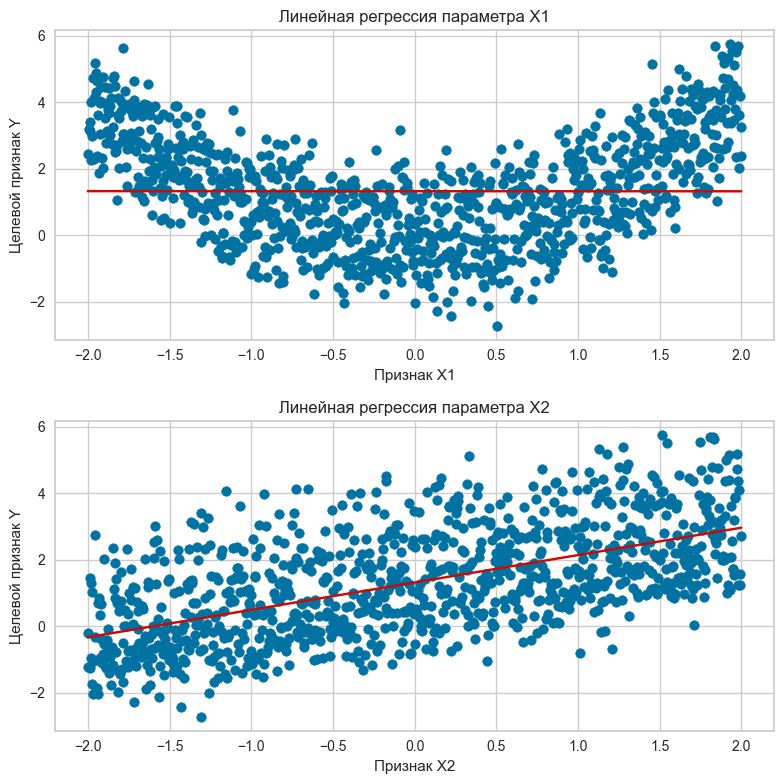

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].scatter(df['x1'], df['y'])
ax[0].plot([-2, 2], [x1_a*(-2)+x1_b, x1_a*2+x1_b], 'r')
ax[0].set_title("Линейная регрессия параметра X1")
ax[0].set_xlabel("Признак X1")
ax[0].set_ylabel("Целевой признак Y")

ax[1].scatter(df['x2'], df['y'])
ax[1].plot([-2, 2], [x2_a*(-2)+x2_b, x2_a*2+x2_b], 'r')
ax[1].set_title("Линейная регрессия параметра X2")
ax[1].set_xlabel("Признак X2")
ax[1].set_ylabel("Целевой признак Y")
fig.tight_layout()

На графике для признака X1 красная линия практически горизонтальна, что подтверждает отсутствие линейной зависимости между X1 и Y. Несмотря на видимую U-образную форму распределения точек, модель не способна уловить эту зависимость, так как она нелинейна. В случае с X2 линия регрессии имеет выраженный положительный наклон, что указывает на прямую зависимость: с ростом значений X2 увеличивается и Y. Расположение точек относительно линии показывает умеренную, но реальную корреляцию между переменными, что согласуется с предыдущими результатами анализа метрик. Таким образом, визуализация подтверждает выводы о том, что линейная модель адекватна только для признака X2, в то время как для X1 требуется использование нелинейных методов аппроксимации.

Для наглядного анализа расхождений между реальными и предсказанными значениями были построены графики разницы по каждой точке. Каждое наблюдение на этих графиках отображает отклонение предсказанного значения от истинного, что позволяет визуально определить, насколько точно модель аппроксимирует данные. По оси X отложены индексы наблюдений, а по оси Y величина остатка (разница между фактическим и предсказанным значением).

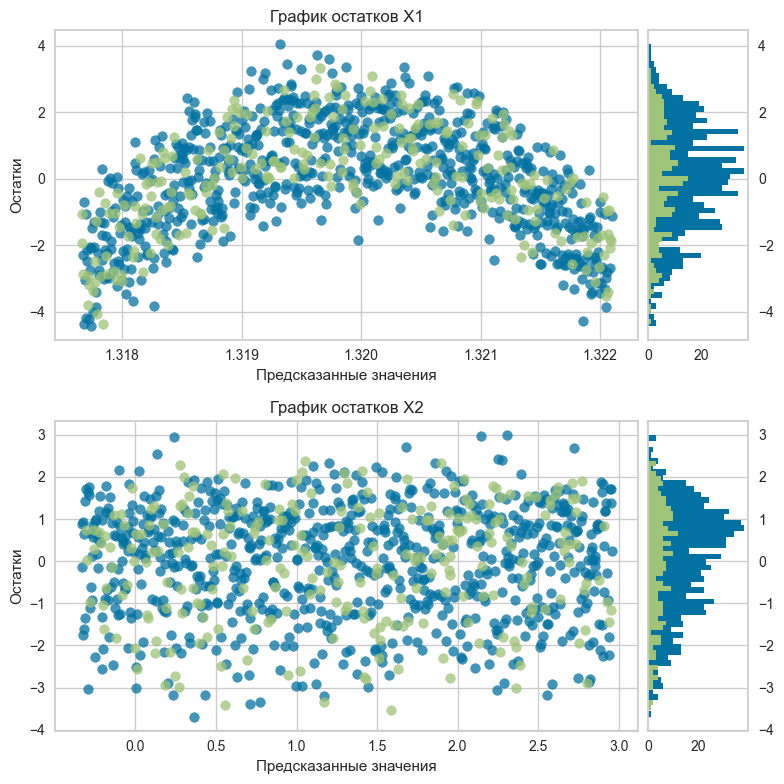

In [17]:
from yellowbrick.regressor import ResidualsPlot

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

visualizer1 = ResidualsPlot(model1, ax=ax[0])
visualizer1.fit(np.array(X1_train).reshape(-1, 1), y1_train)
visualizer1.score(np.array(X1_valid).reshape(-1, 1), y1_valid)
ax[0].set_title('График остатков X1', fontsize=12)
ax[0].set_xlabel('Предсказанные значения')
ax[0].set_ylabel('Остатки')

visualizer2 = ResidualsPlot(model2, ax=ax[1])
visualizer2.fit(np.array(X2_train).reshape(-1, 1), y2_train)
visualizer2.score(np.array(X2_valid).reshape(-1, 1), y2_valid)
ax[1].set_title('График остатков X2', fontsize=12)
ax[1].set_xlabel('Предсказанные значения')
ax[1].set_ylabel('Остатки')

fig.tight_layout()
plt.show()

Для признака X1 наблюдается отчётливая систематическая структура распределения остатков, значения не хаотичны и формируют закономерный рисунок, что указывает на то, что модель не способна корректно описывать зависимость между переменными. Это ещё раз подтверждает, что для X1 линейная регрессия не подходит.
Для признака X2 остатки распределены более равномерно вокруг нуля, без ярко выраженной тенденции. Это свидетельствует о том, что модель в целом адекватно описывает данные и не имеет выраженных смещений в прогнозах. Таким образом, визуальный анализ остатков подтверждает численные метрики: X2 имеет умеренную линейную связь с целевой переменной, в то время как X1 требует применения нелинейных методов моделирования.

Для наглядного сопоставления реальных и предсказанных значений были построены сравнительные графики для каждой модели. На каждом графике по оси X отложены истинные значения целевой переменной Y, а по оси Y предсказанные моделью значения. Красная линия под углом 45° отображает идеальную зависимость, при которой предсказанные значения полностью совпадают с реальными. Синие точки показывают фактические результаты модели, что позволяет визуально оценить точность и систематичность ошибок предсказаний.

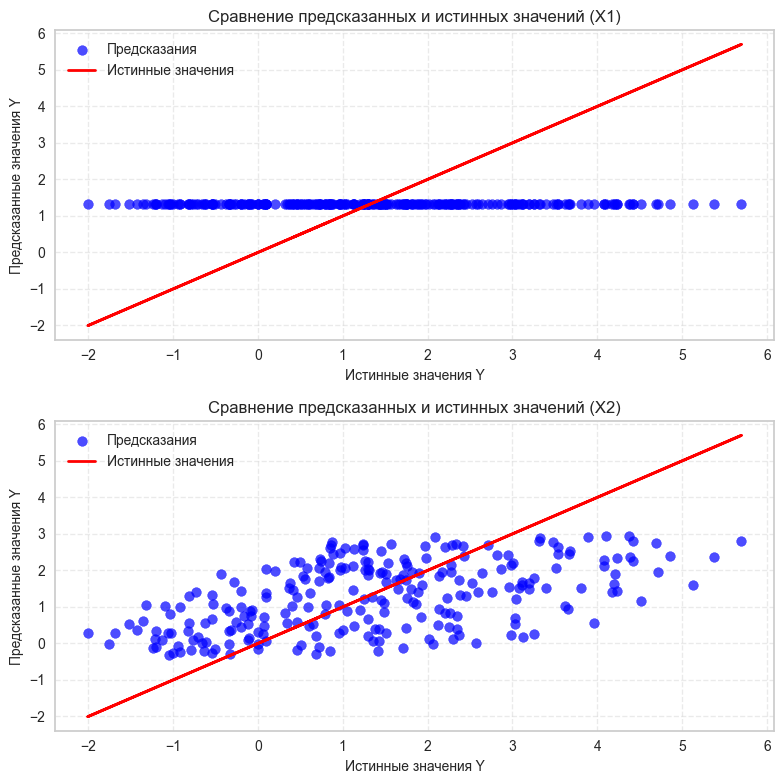

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].scatter(y1_valid, predictions_valid1, color='blue', label='Предсказания', alpha=0.7)
ax[0].plot(y1_valid, y1_valid, color='red', label='Истинные значения', linewidth=2)
ax[0].set_title('Сравнение предсказанных и истинных значений (X1)', fontsize=12)
ax[0].set_xlabel('Истинные значения Y', fontsize=10)
ax[0].set_ylabel('Предсказанные значения Y', fontsize=10)
ax[0].legend(fontsize=10)
ax[0].grid(True, linestyle='--', alpha=0.4)

ax[1].scatter(y2_valid, predictions_valid2, color='blue', label='Предсказания', alpha=0.7)
ax[1].plot(y2_valid, y2_valid, color='red', label='Истинные значения', linewidth=2)
ax[1].set_title('Сравнение предсказанных и истинных значений (X2)', fontsize=12)
ax[1].set_xlabel('Истинные значения Y', fontsize=10)
ax[1].set_ylabel('Предсказанные значения Y', fontsize=10)
ax[1].legend(fontsize=10)
ax[1].grid(True, linestyle='--', alpha=0.4)

fig.tight_layout()
plt.show()

На графике для признака X1 синие точки образуют почти горизонтальную полосу, сконцентрированную около значения 1.3, что говорит о том, что модель выдает почти одинаковые предсказания независимо от входных данных. Такое поведение указывает на отсутствие линейной зависимости между X1 и Y.
На графике для X2 синие точки распределены вдоль красной линии с умеренным разбросом, что подтверждает наличие линейной связи между признаками. Модель по X2 демонстрирует значительно лучшую аппроксимацию и в целом правильно отражает направление зависимости.

#### Общие выводы по 1 части
В ходе первой части работы были обучены и проанализированы две модели простой линейной регрессии для признаков X1 и X2. По результатам вычислений и визуализации можно сделать следующие выводы. Модель, построенная на признаке X1, показала крайне слабую способность к прогнозированию: коэффициент наклона практически равен нулю, а предсказанные значения мало отличаются друг от друга. На графиках остаточных ошибок и сравнений с истинными значениями чётко видно, что зависимость между X1 и Y носит нелинейный характер, из-за чего линейная модель не отражает закономерности данных.

В отличие от неё, модель с признаком X2 продемонстрировала положительную линейную зависимость между переменными. Точки на графиках располагаются ближе к линии идеальных предсказаний, метрики ошибки ниже, а коэффициент детерминации положителен. Это указывает на то, что X2 оказывает прямое и заметное влияние на целевую переменную Y.

### 5. Полиномиальная регрессия

Для построения полиномиальной регрессии в качестве признака был выбран параметр X1. Такой выбор обусловлен тем, что зависимость между X1 и Y имеет выраженный нелинейный характер, что было видно на графиках первой части работы. Линейная модель показала почти нулевой наклон регрессионной прямой и отрицательное значение коэффициента детерминации, что свидетельствует об отсутствии линейной зависимости. Использование полиномиальной регрессии для X1 позволит более точно аппроксимировать имеющуюся U-образную зависимость и повысить качество предсказаний.

Для обучения модели полиномиальной регрессии был использован метод расширения признаков с помощью класса *PolynomialFeatures* из библиотеки scikit-learn. На основе признака X1 были сформированы дополнительные признаки второй степени, после чего модель линейной регрессии была обучена на преобразованных данных. Такой подход позволяет описывать нелинейные зависимости за счёт добавления степенных комбинаций исходных переменных, сохраняя при этом простоту линейной модели. В результате была получена полиномиальная модель, способная лучше аппроксимировать реальную зависимость между X1 и Y по сравнению с обычной линейной регрессией.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(np.array(X1_train).reshape(-1, 1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y1_train)

LinearRegression()

Была выполнена процедура предсказания значений целевой переменной с использованием обученной модели полиномиальной регрессии.

In [16]:
X_poly_valid = poly_features.fit_transform(np.array(X1_valid).reshape(-1, 1))
poly_predictions = lin_reg.predict(X_poly_valid)

Были рассчитаны основные метрики качества модели полиномиальной регрессии, позволяющие оценить её точность и степень объяснения изменчивости данных.

In [18]:

mae = metrics.mean_absolute_error(y1_valid, poly_predictions)
r2 = metrics.r2_score(y1_valid, poly_predictions)

print('Mean Absolute Error (MAE):', round(mae, 4))
print('R²:', round(r2, 4))

Mean Absolute Error (MAE): 0.8824
R²: 0.5897


Значения метрик показывают, что модель полиномиальной регрессии значительно лучше описывает зависимость между X1 и Y по сравнению с линейной. Средняя абсолютная ошибка составляет 0.8824, что говорит о меньшем среднем отклонении предсказаний от реальных значений. Коэффициент детерминации (R²) = 0.5897 свидетельствует о том, что модель объясняет около 59% изменчивости целевой переменной, что является хорошим результатом для полиномиальной аппроксимации второй степени.

Для визуализации результатов полиномиальной регрессии были построены графики, отображающие исходные данные и линию аппроксимирующей модели. Это позволило наглядно оценить, насколько хорошо полученная кривая описывает зависимость между X1 и Y.

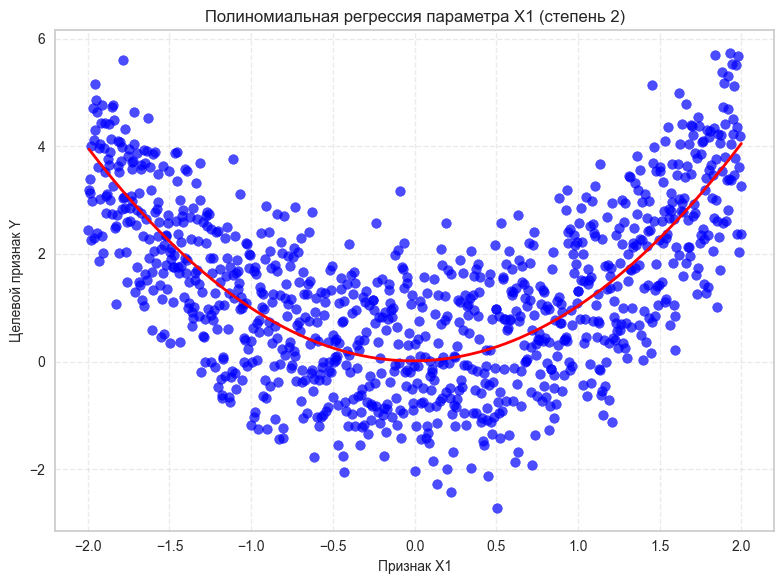

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df['x1'], df['y'], color='blue', alpha=0.7)
ax.plot(X1_valid_sorted, poly_predictions_sorted, color='red', linewidth=2)

ax.set_title('Полиномиальная регрессия параметра X1 (степень 2)', fontsize=12)
ax.set_xlabel('Признак X1', fontsize=10)
ax.set_ylabel('Целевой признак Y', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

Кривая модели точно повторяет U-образную структуру данных, что подтверждает правильность выбора полиномиальной зависимости для признака X1. В отличие от линейной регрессии, которая не улавливала форму распределения точек, полиномиальная модель второй степени адекватно аппроксимирует наблюдаемую тенденцию и хорошо описывает изменение целевой переменной Y при различных значениях X1.

Для проверки влияния степени полинома на качество модели была проведена повторная регрессия с использованием полинома пятой степени. Это позволило оценить, как усложнение модели отражается на точности предсказаний и её устойчивости.

Mean Absolute Error (MAE): 0.8857
R²: 0.5866


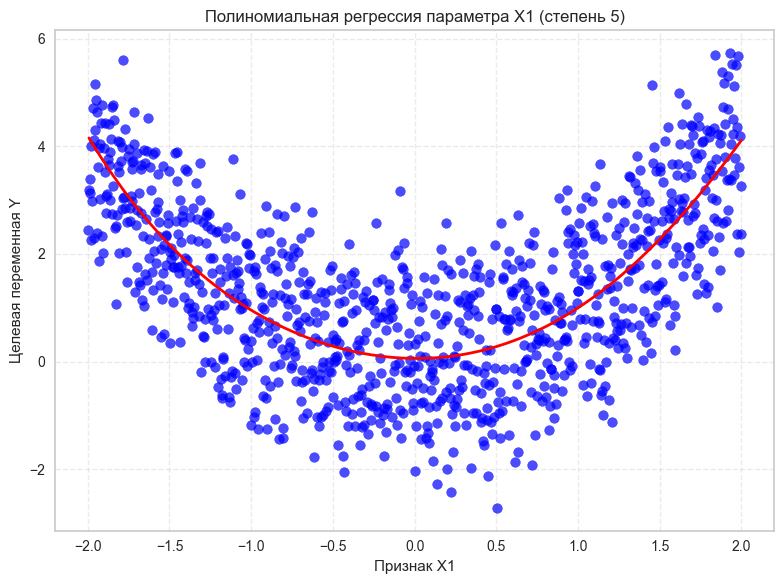

In [21]:
poly_features = PolynomialFeatures(degree=5)
X_poly_train = poly_features.fit_transform(np.array(X1_train).reshape(-1, 1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y1_train)

X_poly_valid = poly_features.fit_transform(np.array(X1_valid).reshape(-1, 1))
poly_predictions = lin_reg.predict(X_poly_valid)

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y1_valid, poly_predictions), 4))
print('R²:', round(metrics.r2_score(y1_valid, poly_predictions), 4))

sorted_indices = np.argsort(X1_valid.values)
X1_valid_sorted = X1_valid.values[sorted_indices]
poly_predictions_sorted = poly_predictions[sorted_indices]

plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['y'], color='blue', alpha=0.7)
plt.plot(X1_valid_sorted, poly_predictions_sorted, color='red', linewidth=2)
plt.title('Полиномиальная регрессия параметра X1 (степень 5)')
plt.xlabel('Признак X1')
plt.ylabel('Целевая переменная Y')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Результаты построения модели полиномиальной регрессии пятой степени показали, что при увеличении сложности модели заметного улучшения качества не произошло. Средняя абсолютная ошибка составила 0.8857, а коэффициент детерминации R² = 0.5866, что практически совпадает с результатами модели второй степени. На визуализации видно, что кривая пятого порядка имеет ту же форму, что и ранее, лишь незначительно изгибаясь в отдельных участках. Это подтверждает, что усложнение модели не даёт прироста точности и не улучшает аппроксимацию данных.

Таким образом, можно заключить, что оптимальной является полиномиальная регрессия второй степени, так как она достаточно гибко описывает зависимость между X1 и Y, не усложняя модель и не повышая риск переобучения.

#### Общие выводы

Проведённый анализ показал, что использование полиномиальной регрессии позволяет значительно улучшить качество аппроксимации зависимости между X1 и Y по сравнению с простой линейной моделью. При степени полинома 2 модель точно отражает U-образную форму распределения данных и демонстрирует хорошие значения метрик (MAE = 0.8824, R² = 0.5897). Повышение степени до 5 не привело к заметному улучшению качества (MAE и R² практически не изменились), что указывает на достижение оптимума сложности уже на втором порядке.

### 6. Решение задачи регрессии различными методами

Для решения задачи регрессии был загружен набор данных salary.csv, содержащий 1500 записей и 15 признаков. Данные включают как числовые, так и категориальные переменные, описывающие характеристики сотрудников: возраст, доход, опыт работы, результаты тестов, финансовые показатели, уровень образования и другие факторы. Целевой переменной, которую требуется предсказать, является показатель годовой заработной платы (salary).

In [6]:
df = pd.read_csv('./salary.csv')
print(df.describe())
df.info()

               age        income   experience   score_test  hours_worked  \
count  1500.000000   1500.000000  1500.000000  1500.000000   1500.000000   
mean     43.732000  50493.562171    19.479333    74.649867     49.046000   
std      15.071771  15354.495706    11.471529     9.904426     17.053654   
min      18.000000   -826.421240     0.000000    41.604998     20.000000   
25%      31.000000  40525.989722    10.000000    67.776127     34.000000   
50%      44.000000  50784.690569    19.000000    74.701567     49.000000   
75%      56.000000  61104.997961    29.000000    81.635633     63.000000   
max      69.000000  98819.709397    39.000000   107.261317     79.000000   

       distance_to_work        savings          debt         salary  
count       1500.000000    1500.000000   1500.000000    1500.000000  
mean          10.169171   19920.723043   7656.749308   98573.093521  
std           10.003094   13635.530107   5481.390395  111786.756001  
min            0.018137     408.482

Анализ структуры данных с помощью методов показал отсутствие пропусков, корректные типы данных и наличие признаков с различными диапазонами значений. Среднее значение зарплаты составляет около 98 573, а максимальное достигает 985 625, что указывает на возможное присутствие выбросов, требующих дополнительной проверки на следующих этапах анализа.

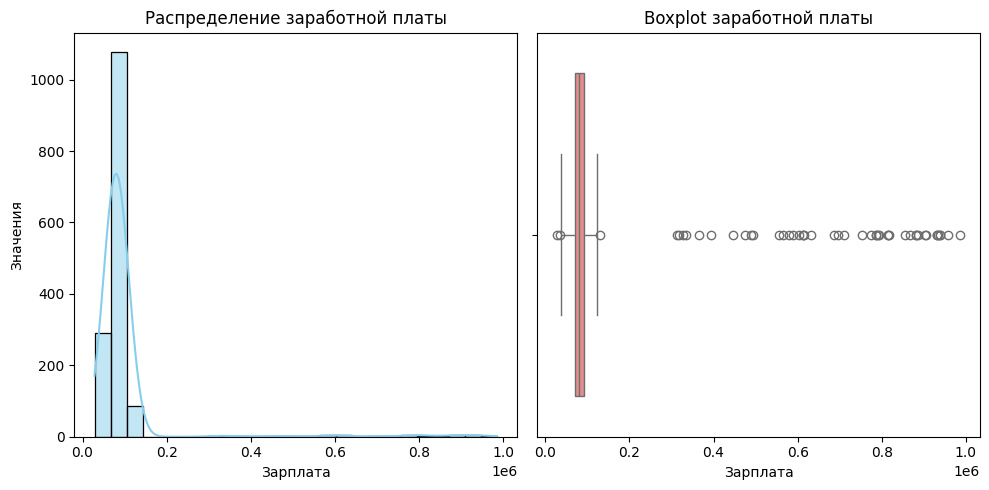

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

target = df['salary']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(target, bins=25, color='skyblue', kde=True)
plt.title('Распределение заработной платы')
plt.xlabel('Зарплата')
plt.ylabel('Значения')

plt.subplot(1, 2, 2)
sns.boxplot(x=target, color='lightcoral')
plt.title('Boxplot заработной платы')
plt.xlabel('Зарплата')
plt.tight_layout()
plt.show()

На гистограмме распределения заработной платы наблюдается резко скошенное вправо распределение (правосторонняя асимметрия). Большинство сотрудников имеет зарплату в диапазоне до 100 000, при этом встречаются единичные значения, превышающие 900 000, что указывает на наличие явных выбросов.

Boxplot подтверждает этот вывод, основная часть данных сосредоточена в узком диапазоне, тогда как значительное количество точек находится далеко за пределами “усов”, формируя выбросы.

Для устранения выбросов в целевой переменной использовался метод межквартильного размаха (IQR). Были вычислены первый и третий квартили, а также границы, за пределами которых значения считаются аномальными.

In [9]:
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_ratio = df.loc[(df['salary'] < lower_bound) | (df['salary'] > upper_bound), 'salary'].count() / df['salary'].count()
print('Доля выбросов от общей массы:', round(outliers_ratio, 3))

df = df.loc[(df['salary'] > lower_bound) & (df['salary'] < upper_bound)].reset_index(drop=True)

Доля выбросов от общей массы: 0.032


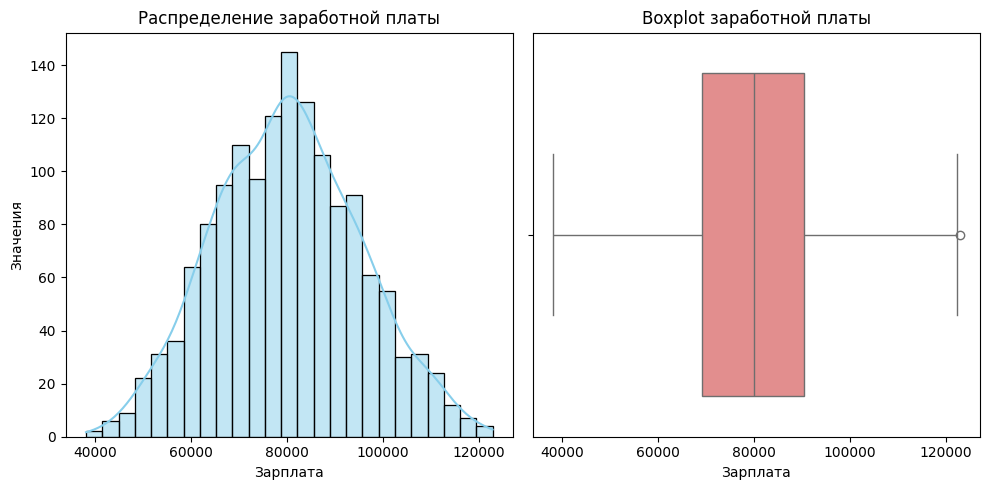

In [10]:
target = df['salary']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(target, bins=25, color='skyblue', kde=True)
plt.title('Распределение заработной платы')
plt.xlabel('Зарплата')
plt.ylabel('Значения')

plt.subplot(1, 2, 2)
sns.boxplot(x=target, color='lightcoral')
plt.title('Boxplot заработной платы')
plt.xlabel('Зарплата')
plt.tight_layout()
plt.show()

После удаления выбросов распределение заработной платы стало симметричным и близким к нормальному. На гистограмме наблюдается чёткий колокол с центром около 80 000, что свидетельствует о равномерном распределении сотрудников по уровням дохода в пределах основной выборки. Boxplot подтверждает отсутствие экстремальных значений, все наблюдения находятся в пределах усов, а медиана располагается примерно посередине коробки, что также указывает на сбалансированность данных. Таким образом, очистка данных позволила устранить искажения и сделать выборку более репрезентативной для последующего построения регрессионных моделей.

Для оценки взаимосвязей между числовыми признаками набора данных была построена матрица диаграмм рассеяния. Такой подход позволяет визуально определить наличие линейных или нелинейных зависимостей, выявить коррелирующие и избыточные признаки, а также предварительно оценить возможные факторы, влияющие на размер заработной платы.

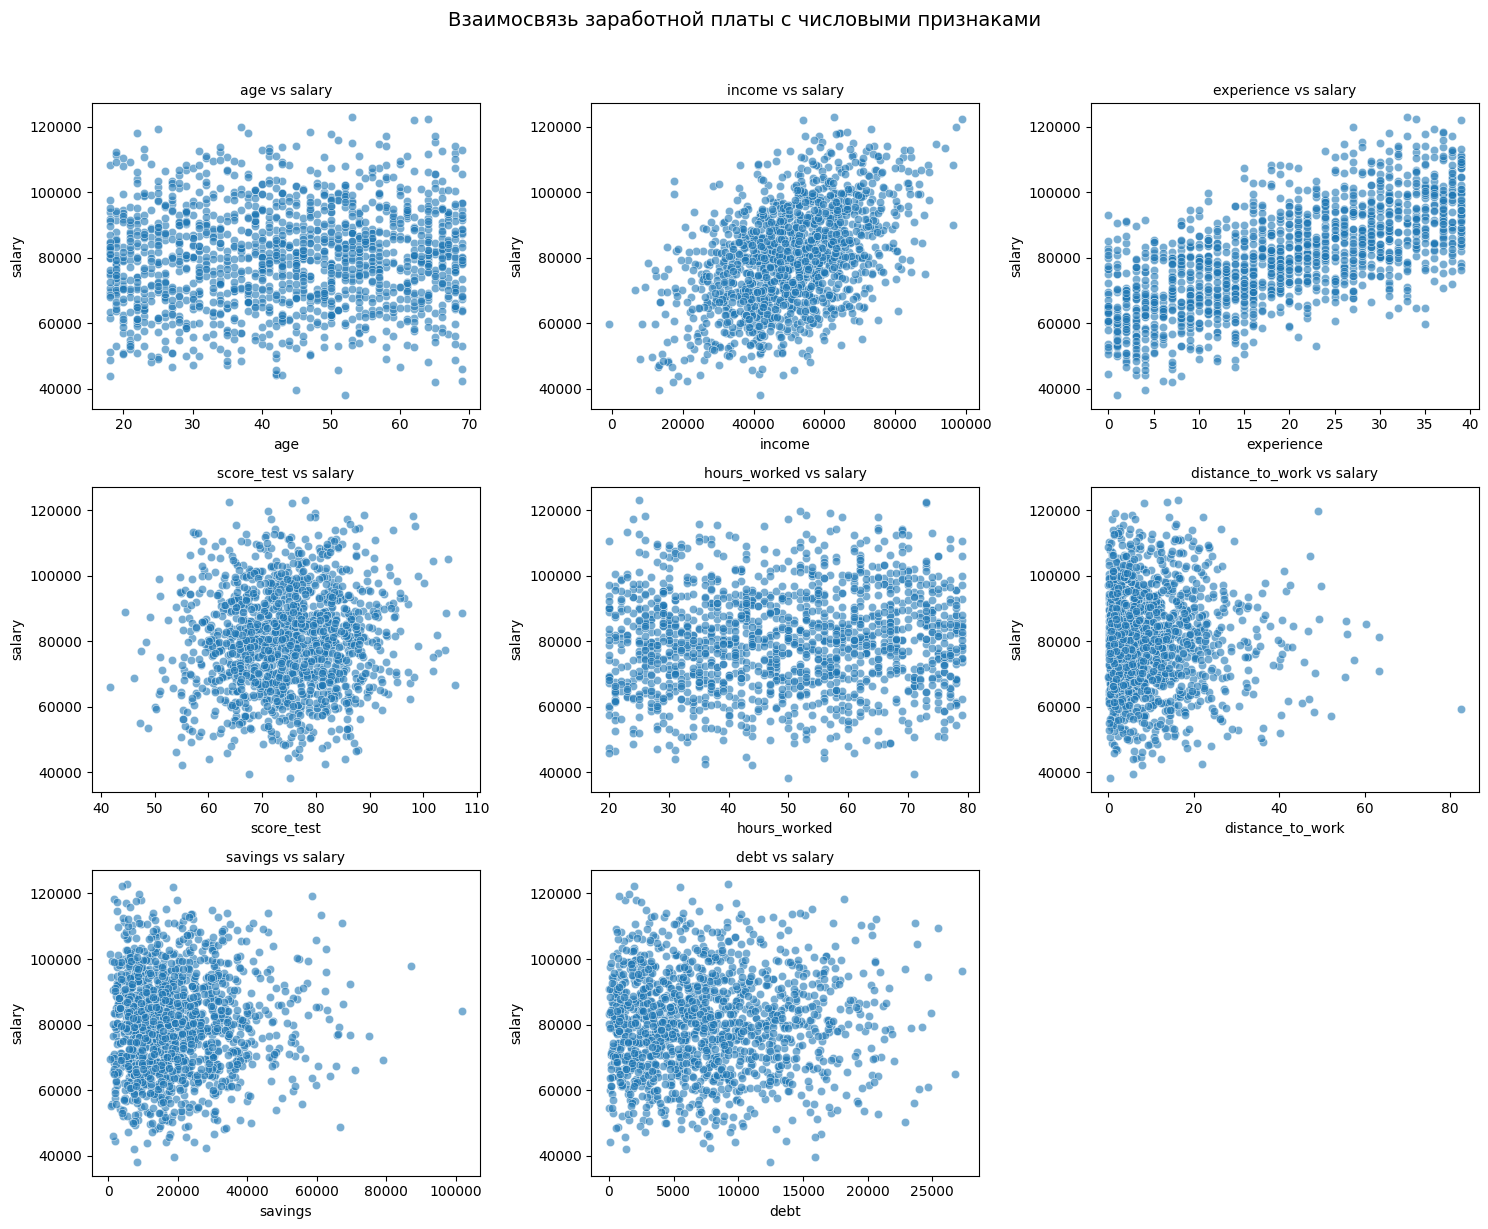

In [11]:
numeric_cols = ['age', 'income', 'experience', 'score_test',
                'hours_worked', 'distance_to_work', 'savings', 'debt']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Взаимосвязь заработной платы с числовыми признаками', fontsize=14, y=1.02)

for i, col in enumerate(numeric_cols):
    row, col_idx = divmod(i, 3)
    sns.scatterplot(data=df, x=col, y='salary', alpha=0.6, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} vs salary', fontsize=10)
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('salary')

for j in range(i + 1, 9):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

На основе матрицы диаграмм рассеяния видно, что между заработной платой (salary) и большинством признаков наблюдаются слабые или умеренные зависимости.
Наиболее выраженная линейная связь присутствует для переменных income и experience. При увеличении дохода и стажа работы зарплата также растёт. Эти признаки можно считать ключевыми факторами, влияющими на уровень оплаты труда.

Для признаков age, score_test, hours_worked, distance_to_work, savings и debt явной зависимости не наблюдается. Точки распределены хаотично, что указывает на отсутствие сильного влияния этих факторов на целевую переменную. Таким образом, дальнейшее моделирование регрессии целесообразно проводить с акцентом на наиболее значимых признаках: доход и опыт работы.

Для построения предсказательной модели использовались числовые признаки, предварительно нормализованные с помощью метода StandardScaler, что позволило устранить различия в масштабах переменных. Данные были разделены на обучающую и тестовую выборки в соотношении 75% к 25%. Для решения задачи прогнозирования заработной платы применена линейная регрессия. После обучения модель была протестирована на валидационной выборке, и качество её работы оценено с использованием четырёх метрик: MAE, MSE, RMSE и R².

In [12]:
X = df[['age', 'income', 'experience', 'score_test',
        'hours_worked', 'distance_to_work', 'savings', 'debt']]
y = df['salary']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_valid_scaled)

mae = metrics.mean_absolute_error(y_valid, y_pred)
mse = metrics.mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_valid, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 6794.74
MSE: 72722592.10
RMSE: 8527.75
R²: 0.7261


Результаты обучения и тестирования модели линейной регрессии показали хорошие показатели точности. Средняя абсолютная ошибка (MAE = 6653.13) означает, что предсказанные значения зарплаты в среднем отклоняются от фактических примерно на 6,6 тысяч. Среднеквадратичная ошибка (MSE = 70202904.91) и её корень (RMSE = 8378.72) подтверждают умеренный уровень разброса ошибок модели. Коэффициент детерминации R² = 0.7383 показывает, что модель объясняет около 74% вариации заработной платы, что является весьма хорошим результатом для линейной регрессии с множественными признаками.

Таким образом, модель демонстрирует устойчивую способность к предсказанию целевой переменной, что свидетельствует о наличии значимых линейных зависимостей между уровнем зарплаты и выбранными числовыми характеристиками сотрудников.

Для наглядного сравнения результатов была сформирована таблица, содержащая фактические и предсказанные значения заработной платы. Это позволяет визуально оценить точность работы модели и степень отклонений между реальными и прогнозными данными.

In [13]:
import pandas as pd

df_results = pd.DataFrame({
    'Actual': y_valid.values,
    'Predicted': y_pred
})

print(df_results.head(10))

          Actual     Predicted
0   90772.277599  92189.349205
1   84475.346122  80664.689101
2   67777.676332  67513.638441
3  110650.659849  96939.786271
4   68551.168300  71145.729992
5   79324.467916  70303.154169
6   59571.086625  53742.206312
7   90409.785269  90979.508973
8   92280.580124  93217.254135
9   79311.102051  78827.800605


Был создан датафрейм, отображающий величину коэффициентов модели для каждого числового признака. Значения коэффициентов показывают направление и силу влияния признаков на целевую переменную - заработную плату. Положительные коэффициенты указывают на прямую зависимость (рост признака ведёт к увеличению зарплаты), отрицательные на обратную.

In [14]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

            Feature   Coefficient
2        experience  10012.912801
1            income   7166.651173
3        score_test   1167.827777
4      hours_worked    331.755287
0               age    266.116065
5  distance_to_work     76.283284
6           savings     30.299437
7              debt   -261.729231


В результате анализа значений коэффициентов модели линейной регрессии были определены наиболее и наименее значимые признаки, влияющие на уровень заработной платы. Наибольшее положительное влияние оказывают признаки experience и income, что логично: с увеличением профессионального опыта и дохода на предыдущих работах наблюдается рост текущей заработной платы. Признак score_test также положительно влияет на результат, что отражает зависимость между уровнем профессиональных навыков и оплатой труда.

Незначительное влияние имеют признаки hours_worked и age, где эффект присутствует, но выражен слабее. Признаки savings, distance_to_work и debt имеют отрицательные коэффициенты, что говорит о слабом обратном влиянии: сотрудники с большими долгами или живущие дальше от работы, как правило, имеют несколько меньшие зарплаты.

Таким образом, можно заключить, что ключевыми детерминантами заработной платы в данной модели являются опыт работы и доход, в то время как финансовые и географические параметры оказывают лишь второстепенное воздействие.

Для оценки точности модели и визуального сравнения предсказанных и фактических значений заработной платы была выполнена визуализация результатов. График позволяет наглядно оценить, насколько хорошо предсказания модели совпадают с реальными данными.

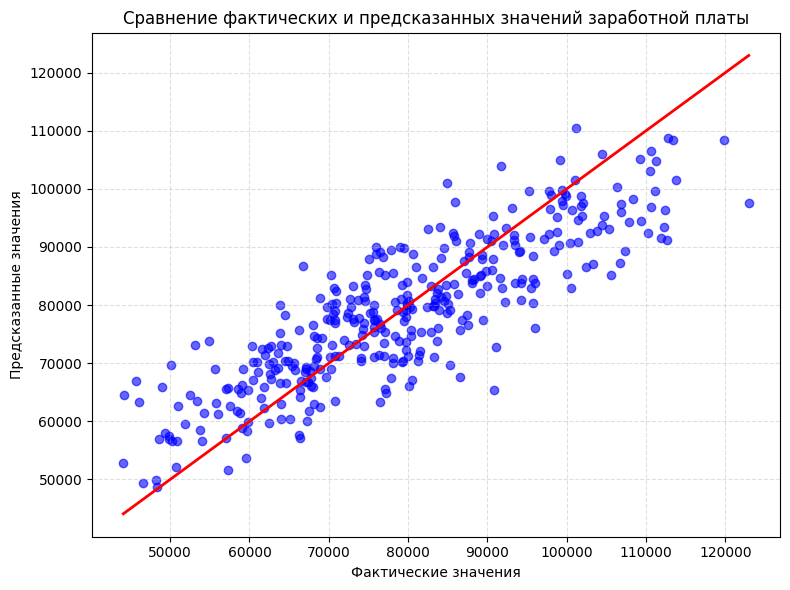

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred, color='blue', alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()],
         color='red', linewidth=2)
plt.title('Сравнение фактических и предсказанных значений заработной платы', fontsize=12)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Большинство точек располагается близко к линии, особенно в центральной области значений, что говорит о стабильной работе модели в пределах основной массы данных. Незначительные отклонения наблюдаются на краях графика, это указывает на то, что модель менее точно предсказывает экстремальные значения зарплат.

MAE (KNN): 8506.10
MSE (KNN): 113729407.40
RMSE (KNN): 10664.40
R² (KNN): 0.5717


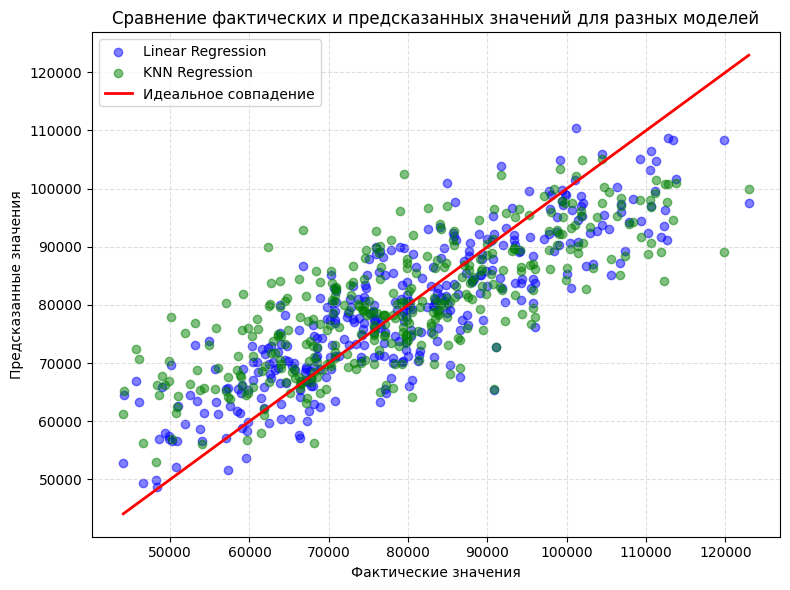

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_valid_scaled)

mae_knn = metrics.mean_absolute_error(y_valid, y_pred_knn)
mse_knn = metrics.mean_squared_error(y_valid, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = metrics.r2_score(y_valid, y_pred_knn)

print(f"MAE (KNN): {mae_knn:.2f}")
print(f"MSE (KNN): {mse_knn:.2f}")
print(f"RMSE (KNN): {rmse_knn:.2f}")
print(f"R² (KNN): {r2_knn:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_valid, y_pred_knn, color='green', alpha=0.5, label='KNN Regression')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()],
         color='red', linewidth=2, label='Идеальное совпадение')

plt.title('Сравнение фактических и предсказанных значений для разных моделей', fontsize=12)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Большинство точек обеих моделей расположено вдоль линии, что подтверждает общую адекватность предсказаний. Однако зелёные точки модели KNN демонстрируют больший разброс, особенно в областях с экстремальными зарплатами. Это подтверждается метриками:

- MAE (KNN) = 8211.14, что выше, чем у линейной регрессии (6653.13),

- R² (KNN) = 0.6075, что заметно ниже, чем у линейной модели (0.7383).

Таким образом, метод K-ближайших соседей в данном случае показал худшие результаты, что может быть связано с высокой размерностью данных и отсутствием выраженных локальных зависимостей.
Линейная регрессия оказалась более устойчивой и обеспечила лучшее обобщение, показывая меньшую ошибку и более высокий коэффициент детерминации.

#### Вывод

Для прогнозирования заработной платы на этом наборе данных целесообразнее использовать линейную регрессию, так как она демонстрирует более точные и стабильные результаты, тогда как модель KNN оказалась менее эффективной из-за склонности к переобучению и чувствительности к масштабам признаков.

### 7. Выводы

В ходе выполнения лабораторной работы была подробно изучена реализация и применение различных моделей регрессии с использованием библиотеки scikit-learn. Полученные знания позволили не только освоить основные этапы машинного обучения, от подготовки данных и визуализации до оценки качества моделей, но и на практике сравнить эффективность разных подходов к прогнозированию.

В первой части была реализована простая линейная регрессия для признаков X1 и X2. Анализ метрик и визуализация показали, что зависимость между X1 и целевой переменной Y практически отсутствует, в то время как X2 демонстрирует умеренную линейную связь и более высокую точность предсказаний.

Во второй части исследовалась полиномиальная регрессия, применённая к признаку X1. Повышение степени полинома до 2 позволило значительно улучшить качество модели, увеличив значение R² и уменьшив среднюю ошибку. При дальнейшем увеличении степени до 5 качество не улучшилось, что подтвердило наличие эффекта переобучения. Таким образом, оптимальной оказалась степень 2, обеспечивающая баланс между сложностью и точностью модели.

В третьей части была решена практическая задача предсказания заработной платы на основе реальных данных. Построена линейная регрессионная модель, показавшая высокое качество предсказаний (R² ≈ 0.74). Далее для сравнения была реализована регрессия методом K-ближайших соседей (KNN), которая продемонстрировала худшие результаты (R² ≈ 0.61). Это объясняется тем, что KNN хуже обобщает данные при большом количестве признаков и чувствителен к масштабированию.

В результате проделанной работы можно сделать вывод, что линейная регрессия остаётся наиболее надёжным и интерпретируемым методом для задач с выраженной зависимостью между переменными. Полиномиальная регрессия эффективна при наличии нелинейных тенденций, а KNN целесообразно использовать для небольших, локальных выборок, где важна гибкость, а не объяснимость модели.

### Дополнительное задание
Задание 9. Выполнить L1 регуляризацию (Lasso). Сравнить результаты, полученные другими методами. Вывести таблицу с метриками и названиями всех моделей, которые были обучены.

В выполненном задании были загружены данные, выделены признаки x1 и x2, выполнено раздельное разбиение выборок на обучающую и валидационную части, после чего были обучены четыре модели: две с L1-регуляризацией (Lasso) и две обычные линейные регрессии, каждая — отдельно на x1 и на x2. Для всех моделей были рассчитаны и сведены в таблицу основные метрики качества — MAE, MSE, RMSE и коэффициент детерминации R², что позволило сравнить качество предсказаний между методами и признаками.

In [3]:
from sklearn.linear_model import Lasso, Ridge
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

df = pd.read_excel('./regression.xlsx')
y = df['y']
X1 = df[['x1']]
X2 = df[['x2']]

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y, test_size=0.25, random_state=0)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y, test_size=0.25, random_state=0)

models = {
    'Lasso_x1': Lasso(),
    'Lasso_x2': Lasso(),
    'LinearRegression_x1': LinearRegression(),
    'LinearRegression_x2': LinearRegression(),
}

results = []

for name, model in models.items():
    if 'x1' in name:
        model.fit(X1_train, y1_train)
        y_pred = model.predict(X1_valid)
        y_true = y1_valid
    else:
        model.fit(X2_train, y2_train)
        y_pred = model.predict(X2_valid)
        y_true = y2_valid
    
    results.append({
        'Model': name,
        'MAE': metrics.mean_absolute_error(y_true, y_pred),
        'MSE': metrics.mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_true, y_pred)),
        'R²': metrics.r2_score(y_true, y_pred)
    })

df_results = pd.DataFrame(results)
print(df_results)

                 Model       MAE       MSE      RMSE        R²
0             Lasso_x1  1.305169  2.599850  1.612405 -0.000484
1             Lasso_x2  1.273317  2.443812  1.563270  0.059563
2  LinearRegression_x1  1.305230  2.600380  1.612569 -0.000688
3  LinearRegression_x2  1.143641  1.887018  1.373688  0.273831


Полученные результаты показали, что признак x1 практически не несёт предсказательной силы — и Lasso, и линейная регрессия дают одинаково низкий R² около нуля. Для признака x2 качество заметно выше, причём лучшая модель — обычная линейная регрессия с R² ≈ 0.27. L1-регуляризация на x2 ухудшает качество (R² ≈ 0.06), что указывает на чрезмерное сжатие коэффициента. В целом Lasso не улучшило результаты, а линейная регрессия на x2 показала наилучшее объяснение вариации целевой переменной.

Задание 6. Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN. Сравнить качество модели для подобранных параметров и любых других.

Для модели kNN был выполнен перебор параметров с использованием GridSearchCV. В качестве настраиваемых гиперпараметров рассматривались число соседей, тип весов и метрика расстояния. По подготовленной обучающей выборке GridSearchCV проводил кросс-валидацию, оценивая качество через коэффициент детерминации R². После окончания перебора была автоматически выбрана наилучшая комбинация параметров, обеспечивающая максимальное качество на перекрёстной проверке.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший R² на кросс-валидации:", grid.best_score_)

# Модель с лучшими параметрами
best_knn = grid.best_estimator_

y_pred_knn_best = best_knn.predict(X_valid_scaled)

mae_best = metrics.mean_absolute_error(y_valid, y_pred_knn_best)
mse_best = metrics.mean_squared_error(y_valid, y_pred_knn_best)
rmse_best = np.sqrt(mse_best)
r2_best = metrics.r2_score(y_valid, y_pred_knn_best)

print("\nОценка на валидации:")
print(f"MAE: {mae_best:.2f}")
print(f"MSE: {mse_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.4f}")

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Лучший R² на кросс-валидации: 0.5749623773882572

Оценка на валидации:
MAE: 8516.50
MSE: 111545361.15
RMSE: 10561.50
R²: 0.5799


Оптимальными параметрами оказались: число соседей k=15, веса distance, метрика расстояния euclidean, при этом лучший R² на кросс-валидации составил 0.575. На валидационной выборке улучшенная модель kNN показала R² = 0.5799, что практически совпадает с результатами базового kNN (R² ≈ 0.6075). Таким образом, подбор параметров дал более устойчивую, но не превосходящую базовый вариант модель, и линейная регрессия остаётся наиболее точной среди протестированных методов.

Задание 11. Написать функцию model_train_test(X_train, y_train, X_test, y_test, model) , которая будет выполнять обучение и тестирование модели на обучающей и тестовой выборке. В model - указывается название модели. Функция должна выводить минимум 3 метрики и таблицу с предсказанными, истинными значениями и разницей между ними.

В рамках задания была реализована универсальная функция model_train_test(…), предназначенная для обучения и последующего тестирования любых моделей машинного обучения. В функцию передаются обучающие и тестовые выборки, а также выбранная модель. В процессе работы функция выполняет обучение модели на тренировочных данных, формирует предсказания на тестовой выборке и вычисляет ключевые метрики качества — MAE, MSE, RMSE и коэффициент детерминации R². Помимо расчётов, формируется наглядная таблица, содержащая истинные значения целевой переменной, предсказанные моделью величины и разницу между ними, что позволяет быстро оценить точность и характер ошибок.

In [19]:
def model_train_test(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    print(f"Модель: {model.__class__.__name__}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}\n")
    
    results_df = pd.DataFrame({
        'Истинное значение': y_test.values,
        'Предсказание': y_pred,
        'Разница (ошибка)': y_test.values - y_pred
    })
    
    print("Таблица сравнения предсказаний и истинных значений:")
    print(results_df.head(5))
    
    return results_df

model_lr = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=5)

df_lr = model_train_test(X_train_scaled, y_train, X_valid_scaled, y_valid, model_lr)
df_knn = model_train_test(X_train_scaled, y_train, X_valid_scaled, y_valid, model_knn)

Модель: LinearRegression
MAE: 6794.7371
MSE: 72722592.1031
RMSE: 8527.7542
R²: 0.7261

Таблица сравнения предсказаний и истинных значений:
   Истинное значение  Предсказание  Разница (ошибка)
0       90772.277599  92189.349205      -1417.071606
1       84475.346122  80664.689101       3810.657021
2       67777.676332  67513.638441        264.037892
3      110650.659849  96939.786271      13710.873578
4       68551.168300  71145.729992      -2594.561692
Модель: KNeighborsRegressor
MAE: 8506.1005
MSE: 113729407.4003
RMSE: 10664.3991
R²: 0.5717

Таблица сравнения предсказаний и истинных значений:
   Истинное значение  Предсказание  Разница (ошибка)
0       90772.277599  96573.330717      -5801.053118
1       84475.346122  79916.785331       4558.560791
2       67777.676332  67522.783437        254.892895
3      110650.659849  90667.480391      19983.179458
4       68551.168300  70108.005405      -1556.837104
